## Mobile prices prediction 

In this project, we have to apply machine learning algorithm and find out mobile prices range.

In [1]:
# Import libraries..
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
# Import dataset
Df = pd.read_csv('train.csv')

In [3]:
# Dispaly first 5 rows of the dataset
Df.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [4]:
# Dispaly last 5 rows of the dataset
Df.tail()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
1995,794,1,0.5,1,0,1,2,0.8,106,6,...,1222,1890,668,13,4,19,1,1,0,0
1996,1965,1,2.6,1,0,0,39,0.2,187,4,...,915,1965,2032,11,10,16,1,1,1,2
1997,1911,0,0.9,1,1,1,36,0.7,108,8,...,868,1632,3057,9,1,5,1,1,0,3
1998,1512,0,0.9,0,4,1,46,0.1,145,5,...,336,670,869,18,10,19,1,1,1,0
1999,510,1,2.0,1,5,1,45,0.9,168,6,...,483,754,3919,19,4,2,1,1,1,3


## Data preprocessing part

In [5]:
# Check shape of the data
Df.shape

(2000, 21)

In [6]:
# Check info of all columns of the dataset..
Df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

In [7]:
# Check column names..
Df.columns

Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi', 'price_range'],
      dtype='object')

In [8]:
# Check for null values in the dataset
Df.isna().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

## Data Analysis and Visualization Part

In [9]:
## Check for unique category in the column of dataset..
Df['price_range'].unique()

array([1, 2, 3, 0], dtype=int64)

<AxesSubplot:ylabel='count'>

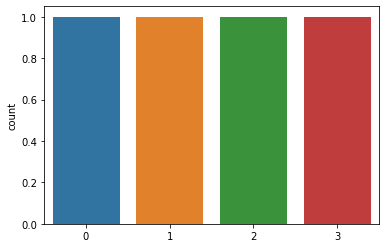

In [10]:
# Visualize on countplot..
sns.countplot(Df['price_range'].unique())

<AxesSubplot:xlabel='price_range', ylabel='battery_power'>

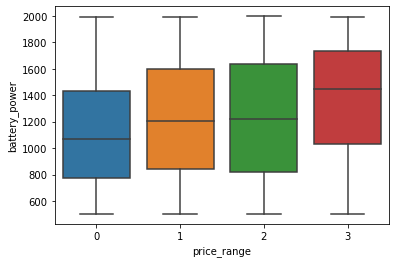

In [11]:
sns.boxplot(x=Df['price_range'], y=Df['battery_power'])

<AxesSubplot:xlabel='price_range', ylabel='n_cores'>

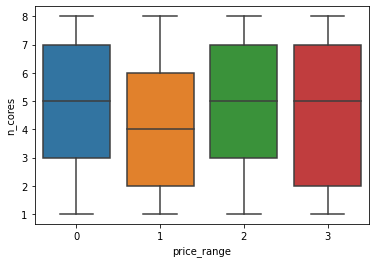

In [12]:
sns.boxplot(x=Df['price_range'], y=Df['n_cores'])

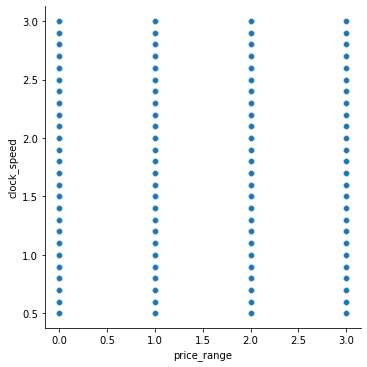

In [13]:
sns.relplot(x = Df["price_range"], y= Df["clock_speed"]);

<AxesSubplot:xlabel='blue', ylabel='count'>

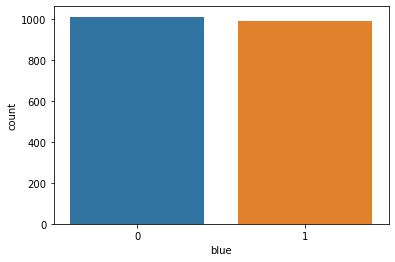

In [14]:
# Check for no of blue mobile or not on countplot.. 
sns.countplot(Df['blue'])

## Create dependent and independent variable for train the model

In [15]:
X = Df.drop('price_range', axis=1)

In [16]:
y = Df['price_range']

In [17]:
X

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,842,0,2.2,0,1,0,7,0.6,188,2,2,20,756,2549,9,7,19,0,0,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,6,905,1988,2631,17,3,7,1,1,0
2,563,1,0.5,1,2,1,41,0.9,145,5,6,1263,1716,2603,11,2,9,1,1,0
3,615,1,2.5,0,0,0,10,0.8,131,6,9,1216,1786,2769,16,8,11,1,0,0
4,1821,1,1.2,0,13,1,44,0.6,141,2,14,1208,1212,1411,8,2,15,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,794,1,0.5,1,0,1,2,0.8,106,6,14,1222,1890,668,13,4,19,1,1,0
1996,1965,1,2.6,1,0,0,39,0.2,187,4,3,915,1965,2032,11,10,16,1,1,1
1997,1911,0,0.9,1,1,1,36,0.7,108,8,3,868,1632,3057,9,1,5,1,1,0
1998,1512,0,0.9,0,4,1,46,0.1,145,5,5,336,670,869,18,10,19,1,1,1


In [18]:
from sklearn.model_selection import train_test_split

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

## Scale the data using standard scaler

In [20]:
from sklearn.preprocessing import StandardScaler

In [21]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_train

array([[ 0.09398835,  1.01384584, -1.25600052, ..., -1.77041434,
        -1.        ,  0.98634324],
       [-1.37116346,  1.01384584, -0.15310355, ...,  0.56483953,
         1.        , -1.01384584],
       [ 1.69089026,  1.01384584,  0.459617  , ..., -1.77041434,
         1.        , -1.01384584],
       ...,
       [-0.99635719,  1.01384584, -1.25600052, ..., -1.77041434,
         1.        , -1.01384584],
       [-0.71695614,  1.01384584,  0.82724932, ...,  0.56483953,
         1.        , -1.01384584],
       [-1.04860291,  1.01384584,  1.19488165, ...,  0.56483953,
         1.        ,  0.98634324]])

In [22]:
X_test = scaler.transform(X_test)
X_test

array([[ 1.3683297 ,  1.01384584, -0.39819176, ...,  0.56483953,
        -1.        ,  0.98634324],
       [-0.13998163,  1.01384584, -0.27564765, ...,  0.56483953,
         1.        , -1.01384584],
       [ 1.29564   , -0.98634324, -0.8883682 , ...,  0.56483953,
        -1.        , -1.01384584],
       ...,
       [-0.55794742, -0.98634324,  0.58216111, ...,  0.56483953,
        -1.        , -1.01384584],
       [-0.4420982 , -0.98634324,  0.82724932, ...,  0.56483953,
        -1.        , -1.01384584],
       [-0.69651216,  1.01384584, -0.27564765, ...,  0.56483953,
         1.        , -1.01384584]])

## Apply different machine learning algorithms to predict the prices of mobile

In [23]:
from sklearn.linear_model import LinearRegression

In [24]:
lir = LinearRegression()

In [25]:
lir.fit(X_train, y_train)

LinearRegression()

## Test score of the model

In [26]:
Linear_model = lir.score(X_test, y_test)
Linear_model

0.9165129580689215

## See prediction of the model

In [27]:
y_pred=lir.predict(X_test)
y_pred

array([ 6.99209664e-01,  1.39118419e+00,  1.19177656e+00,  2.19668471e+00,
        6.43495027e-01,  3.00831364e+00,  1.84986204e+00,  1.61255070e+00,
        3.51451443e+00,  2.46850285e+00,  2.00781888e+00,  1.54761458e+00,
       -8.62046928e-02, -4.23137281e-01,  2.91750863e+00,  5.13993439e-01,
       -1.41374981e-01,  3.06629962e-01,  2.93553414e+00,  2.05627499e+00,
        2.01374857e+00,  7.67142161e-01,  3.48158916e-01,  1.89669719e+00,
        1.91261915e+00,  2.82724247e+00,  1.05015866e+00,  1.54814783e-01,
        2.90880573e+00,  3.05303796e-01,  1.50733064e+00,  1.31264346e+00,
        1.29071556e+00,  5.98506266e-01,  3.34455503e+00,  2.69198333e+00,
        3.17919680e+00,  3.05005822e+00,  3.27630695e+00,  2.90597313e+00,
        1.72323215e+00,  2.26786777e-01,  2.34803305e+00,  2.93460626e+00,
       -9.16748236e-02,  1.35880384e+00, -9.88417813e-02,  3.45831190e+00,
        7.30877949e-01,  2.54990301e+00,  1.24559393e+00,  2.34142550e+00,
        2.96839132e-02,  

<AxesSubplot:xlabel='price_range'>

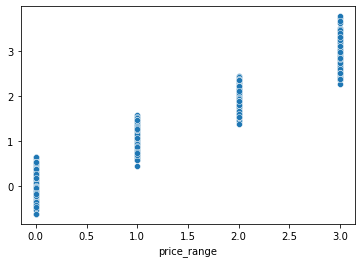

In [28]:
# Create scatterplot for prediction and actual data of linear regression model
sns.scatterplot(y_test, y_pred)

## Test model prediction

In [29]:
lir.predict([[842, 0, 2.2, 0, 1, 0, 7, 0.6, 188, 2, 2, 20, 756, 2549, 9, 7, 19, 0, 0, 1]])

array([2911.26549911])

In [30]:
lir.predict([[1512, 0, 0.9, 0, 4, 1, 46, 0.1, 145, 5, 5, 336, 670, 869, 18, 10, 19, 1, 1, 1]])

array([1357.74603457])

## Check logistic Regression Model 

In [31]:
from sklearn.linear_model import LogisticRegression

In [32]:
#Logistic regression.
lr_model = LogisticRegression()

In [33]:
pred = lr_model.fit(X_train, y_train)

In [34]:
pred

LogisticRegression()

In [35]:
Logistic_regression=pred.score(X_test, y_test)

In [36]:
Logistic_regression

0.96

In [37]:
y_pred1 = pred.predict(X_test)
y_pred1

array([1, 2, 1, 2, 0, 3, 2, 2, 3, 3, 2, 2, 0, 0, 3, 0, 0, 0, 3, 2, 2, 1,
       0, 2, 2, 3, 1, 0, 3, 0, 1, 1, 1, 1, 3, 3, 3, 3, 3, 3, 2, 0, 3, 3,
       0, 1, 0, 3, 1, 3, 1, 2, 0, 0, 3, 1, 2, 3, 1, 0, 2, 1, 3, 1, 0, 2,
       1, 1, 1, 3, 0, 3, 2, 0, 2, 1, 1, 0, 3, 0, 2, 0, 3, 0, 2, 3, 2, 3,
       2, 2, 2, 1, 1, 2, 2, 3, 3, 0, 1, 3, 3, 0, 3, 1, 2, 1, 1, 2, 0, 3,
       1, 1, 3, 0, 3, 0, 3, 2, 1, 2, 1, 3, 3, 0, 2, 0, 2, 0, 3, 2, 0, 3,
       3, 2, 1, 2, 1, 2, 3, 1, 1, 1, 0, 3, 3, 2, 1, 1, 2, 3, 1, 0, 2, 2,
       0, 2, 2, 1, 2, 1, 0, 1, 2, 0, 2, 0, 3, 0, 0, 0, 3, 3, 0, 0, 3, 2,
       3, 2, 3, 1, 1, 3, 2, 0, 1, 2, 0, 0, 1, 3, 3, 2, 0, 1, 0, 1, 0, 0,
       3, 2, 2, 1, 2, 1, 2, 3, 0, 0, 0, 3, 3, 1, 0, 3, 3, 1, 1, 3, 3, 2,
       1, 2, 1, 2, 2, 1, 0, 3, 1, 0, 1, 3, 3, 2, 1, 1, 3, 0, 3, 1, 1, 3,
       2, 1, 2, 1, 2, 3, 3, 3, 2, 3, 0, 2, 1, 3, 0, 2, 3, 0, 1, 3, 3, 1,
       3, 2, 1, 1, 3, 2, 1, 2, 2, 1, 1, 3, 2, 1, 2, 0, 0, 2, 3, 2, 3, 0,
       1, 2, 2, 1, 1, 2, 1, 0, 3, 3, 2, 1, 2, 2, 2,

<AxesSubplot:xlabel='price_range'>

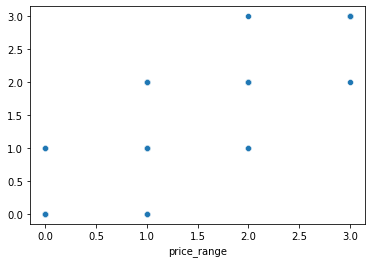

In [38]:
# See the data on scatterplot of the logistic regression model actual and predicted 
sns.scatterplot(y_test, y_pred1)

In [39]:
pred.predict([[842, 0, 2.2, 0, 1, 0, 7, 0.6, 188, 2, 2, 20, 756, 2549, 9, 7, 19, 0, 0, 1]])

array([3], dtype=int64)

In [40]:
# Create dataframe for model names and their prediction...
df = {'Models': ['Linear Regression', 'Logistic Regression'], 'Accuracy of Models': [Linear_model, Logistic_regression]}
data = pd.DataFrame(df)
display(data)

,Models,Accuracy of Models
0,Linear Regression,0.916513
1,Logistic Regression,0.960000


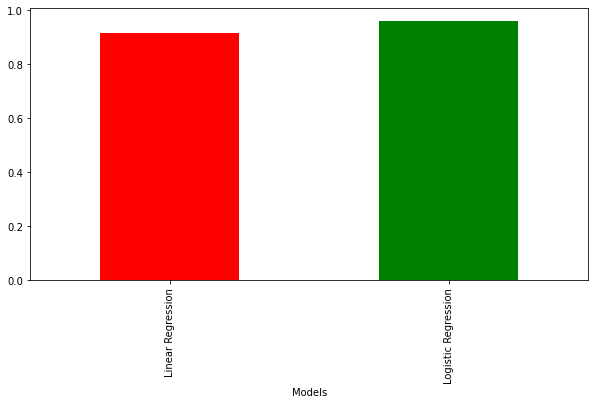

In [41]:
# Show accuracy of the models on barplot
data.plot(x='Models', y='Accuracy of Models', kind='bar', color = ['red', 'green'], figsize = (10, 5),legend=None)
plt.show()